In [1]:
version()

'SageMath version 9.3, Release Date: 2021-05-09'

In [2]:
%display latex

In [3]:
Parallelism().set(nproc=8)

In [4]:
a, m=var('a m')
a0=0.998
m=1

In [5]:
from kerrgeodesic_gw import KerrBH
M=KerrBH(a, m)
print(M)

Kerr spacetime M


In [6]:
rH=M.event_horizon_radius()
rH

sqrt(-a^2 + 1) + 1

In [7]:
rH0=rH.subs({a:a0})
rH0

1.06321392251712

In [8]:
BL.<t,r,th,ph>=M.boyer_lindquist_coordinates()
BL

Chart (M, (t, r, th, ph))

In [9]:
g=M.metric()
g.display()

g = -(a^2*cos(th)^2 + r^2 - 2*r)/(a^2*cos(th)^2 + r^2) dt*dt - 2*a*r*sin(th)^2/(a^2*cos(th)^2 + r^2) dt*dph + (a^2*cos(th)^2 + r^2)/(a^2 + r^2 - 2*r) dr*dr + (a^2*cos(th)^2 + r^2) dth*dth - 2*a*r*sin(th)^2/(a^2*cos(th)^2 + r^2) dph*dt + (2*a^2*r*sin(th)^4 + (a^2*r^2 + r^4 + (a^4 + a^2*r^2)*cos(th)^2)*sin(th)^2)/(a^2*cos(th)^2 + r^2) dph*dph

In [10]:
g[:]

[                                               -(a^2*cos(th)^2 + r^2 - 2*r)/(a^2*cos(th)^2 + r^2)                                                                                                 0                                                                                                 0                                                            -2*a*r*sin(th)^2/(a^2*cos(th)^2 + r^2)]
[                                                                                                0                                                           (a^2*cos(th)^2 + r^2)/(a^2 + r^2 - 2*r)                                                                                                 0                                                                                                 0]
[                                                                                                0                                                                                                 0                                                                               a^2*cos(th)^2 + r^2                                                                                                 0]
[                                                           -2*a*r*sin(th)^2/(a^2*cos(th)^2 + r^2)                                                                                                 0                                                                                                 0 (2*a^2*r*sin(th)^4 + (a^2*r^2 + r^4 + (a^4 + a^2*r^2)*cos(th)^2)*sin(th)^2)/(a^2*cos(th)^2 + r^2)]

## Geodésica tipo tiempo acotada

Establecemos $\mu=1$ y escogemos algunos valores de $E$, $L$ y $Q$ con $E<1$ para asegurar que estamos lidiando con una geodésica acotada.

In [11]:
mu=1
E=0.9
L=1.9
Q=1.3

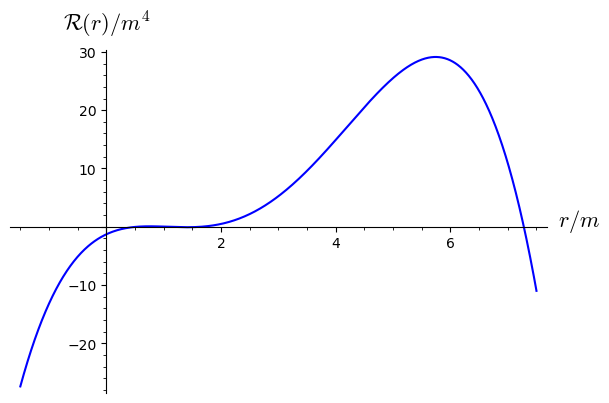

In [12]:
r=var('r')
R(r)=((E^2-mu^2)*r^4
      +2*m*mu*r^3
      +(a0^2*(E^2-mu^2)-Q-L^2)*r^2
      +2*m*(Q+(L-a0*E)^2)*r
      -a0^2*Q)
graph = plot(R(r), (r, -1.5, 7.5), thickness=1.5,
             axes_labels=[r'$r/m$', r'$\mathcal{R}(r)/m^4$'])
graph

In [14]:
rp = find_root(R(r), 1.5,2)
rp

1.649469366699975

In [15]:
ra = find_root(R(r), 7,7.5)
ra

7.279397820865162

In [16]:
r0 = 0.5*(rp+ra)
r0

4.46443359378257

Punto inicial $P$ de la geodésica

In [17]:
P = M.point((0, r0, pi/2, 0), name='P')
print(P)

Point P on the Kerr spacetime M


In [18]:
lmax=50
Li=M.geodesic([0,lmax],P,mu=mu,E=E,L=L,Q=Q,a_num=a0,
             name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 1.53242991997736 d/dt + 0.225078647888823 d/dr + 0.0572056521917122 d/dth + 0.120951132011303 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [ ]:
Li.integrate(step=0.005)

In [ ]:
graph = Li.plot(plot_points=1000, thickness=1.5)
#graph += P.plot
show(graph, viewer='tachyon', aspect_ratio=1, figsize=10)

In [ ]:
lmax=100
Li=M.geodesic([0,lmax],P,mu=mu,E=E,L=L,Q=Q,a_num=a0,
             name='Li', latex_name=r'\mathcal{L}', verbose=True)

In [ ]:
Li.integrate(step=0.005)
graph = Li.plot(plot_points=1000, thickness=1.5)
#graph += P.plot
show(graph, viewer='tachyon', aspect_ratio=1, figsize=10)

In [ ]:
lmax=500
Li=M.geodesic([0,lmax],P,mu=mu,E=E,L=L,Q=Q,a_num=a0,
             name='Li', latex_name=r'\mathcal{L}', verbose=True)

In [ ]:
Li.integrate(step=0.005)
graph = Li.plot(plot_points=5000, thickness=1.5)
#graph += P.plot
show(graph, viewer='tachyon', aspect_ratio=1, figsize=10)

In [ ]:
#integrate?

In [ ]:
#kerrgeodesic_gw?